# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List
---

In [2]:
# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# Lists for holding latitudes-longitudes and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1200)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1200)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    
    City = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.capitalize()
    
    # If the city is unique, then add it to cities list
    
    if City not in cities:
        cities.append(City)
        
# Print the city count and cities list

print(f'\n{len(cities)} cities are selected.\n')
print(cities)


518 cities are selected.

['Isangel', 'Petropavlovsk-kamchatskiy', 'Amderma', 'Mataura', 'Hithadhoo', 'Mahebourg', 'Matara', 'Nikolskoye', 'Novo horizonte', 'Susurluk', 'Sao miguel do araguaia', 'Tasiilaq', 'Nioki', 'Busselton', 'Georgetown', 'Itaituba', 'Nagato', 'Hobart', 'Rikitea', 'Belushya guba', 'Zhicheng', 'Meyungs', 'Meulaboh', 'Geraldton', 'Lorengau', 'Mys shmidta', 'New norfolk', 'Xiaoweizhai', 'Bluff', 'Papara', 'Bredasdorp', 'Port alfred', 'Rio bueno', 'Najran', 'Albany', 'Broome', 'Punta arenas', 'Inirida', 'Beringovskiy', 'San quintin', 'Hermanus', 'Katete', 'Skibbereen', 'Vaitupu', 'Saryshagan', 'Lompoc', 'Umm lajj', 'Atuona', 'Oussouye', 'Yellowknife', 'Harper', 'Tommot', 'Taolanaro', 'Clyde river', 'Vila', 'Qaanaaq', 'Ahipara', 'Cape town', 'Ushuaia', 'Igarka', 'Alofi', 'Karaul', 'Hofn', 'Zaoyang', 'Othonoi', 'Tuktoyaktuk', 'Castro', 'Praya', 'Harindanga', 'Upernavik', 'Airai', 'Malanje', 'Oranjemund', 'Salalah', 'Sorvag', 'Pangobilian', 'Victoria', 'Ribeira grande', 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={your api key}

base_url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&q="


Cities_Data = []


for i, City in enumerate(cities):
    
    query_url = base_url + str(City) + "&appid=" + weather_api_key
    
    try:
        
        data = requests.get(query_url).json()
        
        Country = data['sys']['country']
        
        print(f'{i}. Processing data for {City}, {Country}')
        
        latitude = data["coord"]["lat"]
        
        longitude = data["coord"]["lon"]
        
        temperature = data["main"]["temp_max"]
        
        humidity = data["main"]["humidity"]
        
        Cloudiness = data["clouds"]["all"]
        
        Wind_speed = data["wind"]["speed"]
        
        Cities_Data.append({
                          "City" : City,
                          "Country" : Country,
                          "Latitude" : latitude,
                          "Longitude" : longitude,
                          "Max Temp" : temperature,
                          "Humidity" : humidity,
                          "Cloudiness" : Cloudiness,
                          "Wind Speed" : Wind_speed
                         })
        
    except:
        print(f'\n{i}. City - {City} is not found! Skipping.....\n')
        pass
    
              
# Indicate that Data Loading is complete

print("\n^^^^^^^^^^^^^^^^^^^^^^^^")
print("Data Retrieval Complete      ")
print("\n^^^^^^^^^^^^^^^^^^^^^^^^\n")

0. Processing data for Isangel, VU
1. Processing data for Petropavlovsk-kamchatskiy, RU

2. City - Amderma is not found! Skipping.....

3. Processing data for Mataura, NZ
4. Processing data for Hithadhoo, MV
5. Processing data for Mahebourg, MU
6. Processing data for Matara, LK
7. Processing data for Nikolskoye, RU
8. Processing data for Novo horizonte, BR
9. Processing data for Susurluk, TR
10. Processing data for Sao miguel do araguaia, BR
11. Processing data for Tasiilaq, GL
12. Processing data for Nioki, CD
13. Processing data for Busselton, AU
14. Processing data for Georgetown, MY
15. Processing data for Itaituba, BR
16. Processing data for Nagato, JP
17. Processing data for Hobart, AU
18. Processing data for Rikitea, PF

19. City - Belushya guba is not found! Skipping.....

20. Processing data for Zhicheng, CN

21. City - Meyungs is not found! Skipping.....

22. Processing data for Meulaboh, ID
23. Processing data for Geraldton, AU
24. Processing data for Lorengau, PG

25. City 

210. Processing data for Saint-pierre, RE
211. Processing data for Belyy yar, RU
212. Processing data for Labuhan, ID
213. Processing data for Torbay, CA
214. Processing data for Merritt island, US
215. Processing data for Port lincoln, AU
216. Processing data for Ishigaki, JP
217. Processing data for Dodge city, US
218. Processing data for Lagos, NG
219. Processing data for Comodoro rivadavia, AR
220. Processing data for Dwarka, IN

221. City - Saleaula is not found! Skipping.....

222. Processing data for Atar, MR
223. Processing data for Tautira, PF
224. Processing data for Guerrero negro, MX
225. Processing data for Saint george, US
226. Processing data for Dunedin, NZ
227. Processing data for Saryg-sep, RU
228. Processing data for Samana, DO
229. Processing data for Cabildo, AR
230. Processing data for Gorontalo, ID
231. Processing data for Lasa, IT
232. Processing data for Qaqortoq, GL
233. Processing data for Cabedelo, BR
234. Processing data for Sosnogorsk, RU
235. Processing d

418. Processing data for Nome, US

419. City - Viligili is not found! Skipping.....

420. Processing data for Makakilo city, US
421. Processing data for Hay river, CA
422. Processing data for Carnarvon, AU
423. Processing data for Tanout, NE

424. City - Artyk is not found! Skipping.....

425. Processing data for Livani, LV
426. Processing data for Luwingu, ZM
427. Processing data for Merauke, ID
428. Processing data for Bilma, NE
429. Processing data for Guanica, PR
430. Processing data for Kedrovyy, RU
431. Processing data for Doha, QA
432. Processing data for Komatipoort, ZA
433. Processing data for Vilhena, BR
434. Processing data for Andra, RU
435. Processing data for Saint-francois, FR
436. Processing data for Kiama, AU
437. Processing data for Portland, US
438. Processing data for Muros, ES
439. Processing data for Rio grande, BR
440. Processing data for Chicama, PE
441. Processing data for Gashua, NG
442. Processing data for Kuytun, RU
443. Processing data for Biltine, TD
444. 

### Convert Raw Data to DataFrame

* Display the DataFrame
* Export the city data into a .csv.

In [4]:
# Convert the data into Pandas DataFrame
Cities_Data_df = pd.DataFrame(Cities_Data)

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Export the City_Data into a csv
Cities_Data_df.to_csv(output_data_file, index_label="City_ID")

Cities_Data_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Isangel,VU,-19.55,169.27,80.13,83,93,17.02
1,Petropavlovsk-kamchatskiy,RU,53.05,158.65,32.00,94,40,4.47
2,Mataura,NZ,-46.19,168.86,60.01,87,12,1.01
3,Hithadhoo,MV,-0.60,73.08,83.53,67,64,8.86
4,Mahebourg,MU,-20.41,57.70,78.01,94,75,6.20
...,...,...,...,...,...,...,...,...
467,Paliyad,IN,22.25,71.57,74.57,60,0,9.04
468,Bassano,CA,50.78,-112.47,18.00,65,96,7.00
469,Severo-kurilsk,RU,50.68,156.12,35.82,86,100,15.03
470,Bonthe,SL,7.53,-12.51,81.07,82,36,9.33


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [6]:
# Extract relevant fields from the data frame

Latitudes = Cities_Data_df["Latitude"]
Longitudes = Cities_Data_df["Longitude"]
Temperatures = Cities_Data_df["Max Temp"]
Humudities = Cities_Data_df["Humidity"]
Cloudiness = Cities_Data_df["Cloudiness"]
Wind_speeds = Cities_Data_df["Wind Speed"]

#### Latitude vs. Temperature Plot

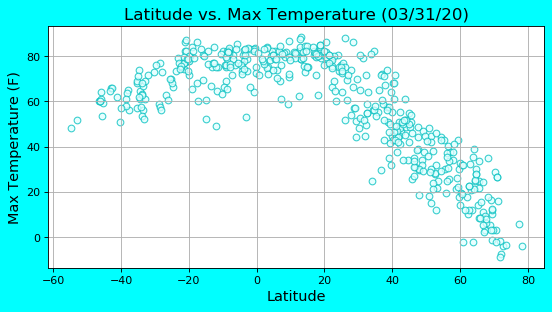

In [7]:
# Build a scatter plot for latitude vs. temperature

plt.figure(figsize=(8, 4), facecolor = 'cyan', edgecolor = 'b', dpi = 80)

plt.scatter(Latitudes, 
            Temperatures,
            facecolors = "lightcyan",
            marker="o",
            edgecolor="c",
            linewidths=1,  
            alpha=0.75,
            label="Cities"
           )

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temperature (%s)" % time.strftime("%x"), 
          color = "k", fontsize = 15)

plt.xlabel("Latitude", color = "k", fontsize = 13)
plt.ylabel("Max Temperature (F)", color = "k", fontsize = 13)


plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

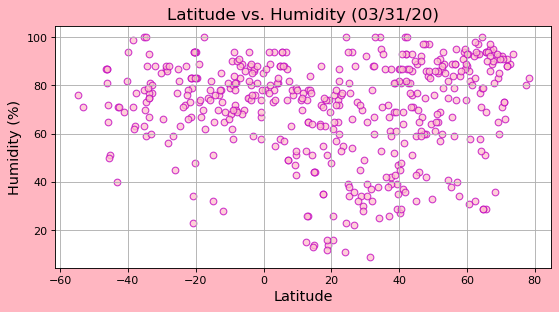

In [8]:
# Build a scatter plot for latitude vs. temperature

plt.figure(figsize=(8, 4),facecolor = 'lightpink', edgecolor = 'b', dpi = 80)

plt.scatter(Latitudes, 
            Humudities,
            facecolors = "pink",
            marker="o",
            edgecolor="m",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"), color = "k", fontsize = 15)

plt.xlabel("Latitude", color = "k", fontsize = 13)
plt.ylabel("Humidity (%)", color = "k", fontsize = 13)

plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatVsHumidity.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

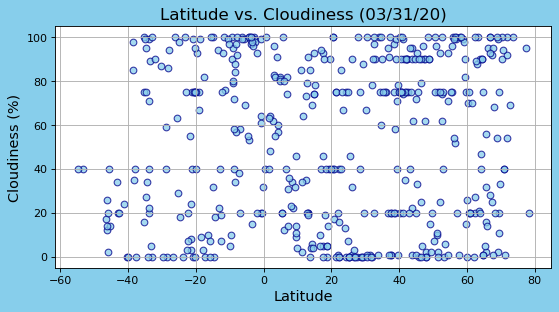

In [9]:
# Build a scatter plot for latitude vs. temperature

plt.figure(figsize=(8, 4),facecolor = 'skyblue', edgecolor = 'b', dpi=80)

plt.scatter(Latitudes, 
            Cloudiness,
            facecolors = "skyblue",
            marker="o",
            edgecolor="darkblue",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties

plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"), color = "k", fontsize = 15)

plt.xlabel("Latitude", color = "k", fontsize = 13)
plt.ylabel("Cloudiness (%)", color = "k", fontsize = 13)

plt.grid(True)

# Save the figure
plt.savefig("../output_data/LatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

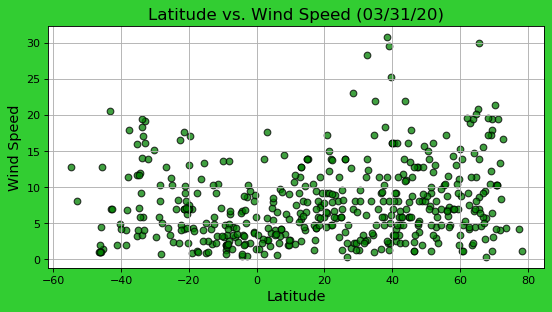

In [10]:
# Build a scatter plot for latitude vs. temperature

plt.figure(figsize=(8, 4),facecolor = 'limegreen', edgecolor = 'b', dpi=80)

plt.scatter(Latitudes, 
            Wind_speeds,
            marker="o",
            facecolors = "green",
            edgecolor="black",
            linewidths=1,  
            alpha=0.75,
            label="Cities")

# Incorporate the other graph properties

plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"), color = "k", fontsize = 15)

plt.xlabel("Latitude", color = "k", fontsize = 13)
plt.ylabel("Wind Speed", color = "k", fontsize = 13)

plt.grid(True)

# Save the figure

plt.savefig("../output_data/LatVsWindSpeed.png")

# Show plot

plt.show()


## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

def linear_reg_plot(x_values,y_values,title,x_label,y_label,line_eq_coord):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    
    # Build the equation y = mx + c

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Build a scatter plot for the relevant fields
    
    plt.figure(figsize=(8, 4), edgecolor = 'b', dpi=80)
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"m-")
    
    # Incorporate the other graph properties
    
    plt.title(title, color = "m", fontsize = 15)
    
    plt.xlabel(x_label, color = "m", fontsize = 14)
    plt.ylabel(y_label, color = "m", fontsize = 14)
    
    # Display the line equation on the map
    
    plt.annotate(line_eq,line_eq_coord,fontsize=15,color="m")

    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemi_df = Cities_Data_df.loc[Cities_Data_df['Latitude']>=0]
Northern_hemi_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
1,Petropavlovsk-kamchatskiy,RU,53.05,158.65,32.00,94,40,4.47
5,Matara,LK,5.95,80.54,73.96,88,12,6.49
6,Nikolskoye,RU,59.70,30.79,30.20,74,75,11.18
8,Susurluk,TR,39.91,28.16,44.60,87,75,16.11
10,Tasiilaq,GL,65.61,-37.64,24.80,29,2,29.97
...,...,...,...,...,...,...,...,...
467,Paliyad,IN,22.25,71.57,74.57,60,0,9.04
468,Bassano,CA,50.78,-112.47,18.00,65,96,7.00
469,Severo-kurilsk,RU,50.68,156.12,35.82,86,100,15.03
470,Bonthe,SL,7.53,-12.51,81.07,82,36,9.33


In [13]:
Southern_hemi_df = Cities_Data_df.loc[Cities_Data_df['Latitude']<0]
Southern_hemi_df

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Isangel,VU,-19.55,169.27,80.13,83,93,17.02
2,Mataura,NZ,-46.19,168.86,60.01,87,12,1.01
3,Hithadhoo,MV,-0.60,73.08,83.53,67,64,8.86
4,Mahebourg,MU,-20.41,57.70,78.01,94,75,6.20
7,Novo horizonte,BR,-21.47,-49.22,74.12,67,24,4.16
...,...,...,...,...,...,...,...,...
459,Tuatapere,NZ,-46.13,167.68,60.01,87,26,1.01
462,Vao,NC,-22.67,167.48,74.46,76,3,16.58
463,Barra do corda,BR,-5.50,-45.25,76.77,86,69,2.35
465,Payo,ID,-3.75,103.64,74.41,89,100,1.95


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

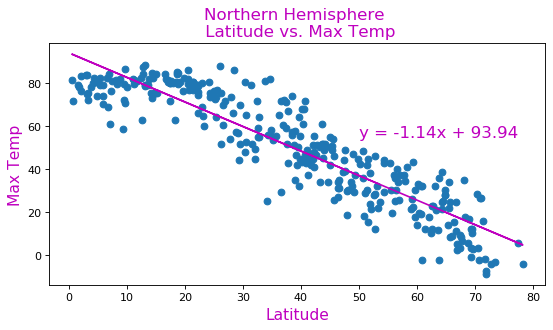

In [24]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Max Temp"],
                "Northern Hemisphere \n Latitude vs. Max Temp",
                "Latitude",
                "Max Temp",
                (50,55))


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

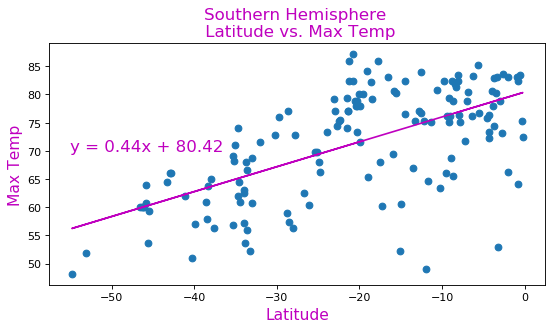

In [54]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Max Temp"],
                "Southern Hemisphere \n Latitude vs. Max Temp",
                "Latitude",
                "Max Temp",
                (-55,70))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

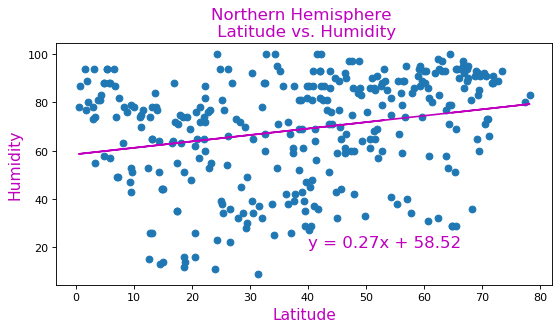

In [35]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Humidity"],
                "Northern Hemisphere \n Latitude vs. Humidity",
                "Latitude",
                "Humidity",
                (40,20))


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

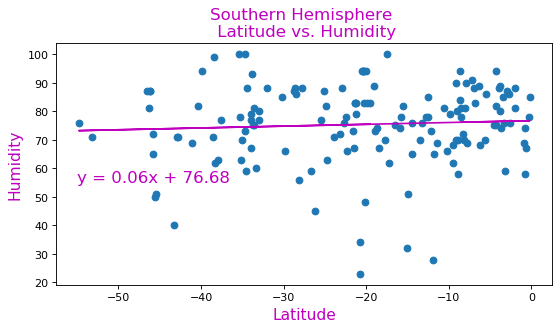

In [36]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Humidity"],
                "Southern Hemisphere \n Latitude vs. Humidity",
                "Latitude",
                "Humidity",
                (-55,55))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

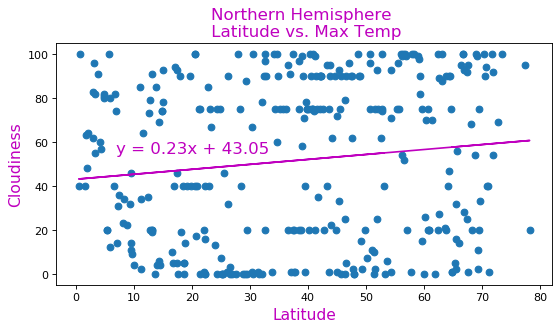

In [53]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Cloudiness"],
                "Northern Hemisphere \n Latitude vs. Max Temp",
                "Latitude",
                "Cloudiness",
                (7, 55))


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

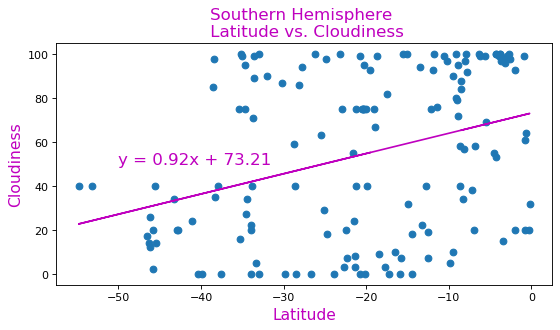

In [40]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Cloudiness"],
                "Southern Hemisphere \n Latitude vs. Cloudiness",
                "Latitude",
                "Cloudiness",
                (-50,50))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

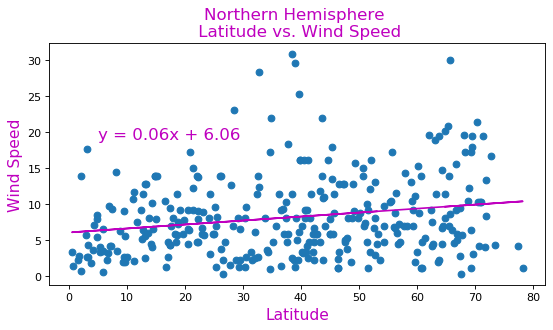

In [52]:
linear_reg_plot(Northern_hemi_df["Latitude"],
                Northern_hemi_df["Wind Speed"],
                "Northern Hemisphere \n Latitude vs. Wind Speed",
                "Latitude",
                "Wind Speed",
                (5,19))


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

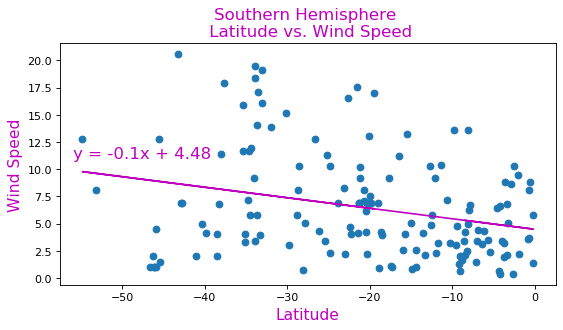

In [48]:
linear_reg_plot(Southern_hemi_df["Latitude"],
                Southern_hemi_df["Wind Speed"],
                "Southern Hemisphere \n Latitude vs. Wind Speed",
                "Latitude",
                "Wind Speed",
                (-56,11))